In [1]:
##################### Libraries ########################
import pandapower as pp 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
net=pp.networks.ieee_european_lv_asymmetric()
net.ext_grid.loc[0,'vm_pu']=1

In [6]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,alpha,temperature_degree_celsius,description,line_idx,folder_id,section_idx,c0_nf_per_km,r0_ohm_per_km,x0_ohm_per_km,pf_name
0,LINE1,4c_70,1,2,0.001098,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,0.0,LV_Grid,0,0,1.505,0.083,LINE1
1,LINE2,4c_70,2,3,0.000115,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,1.0,LV_Grid,0,0,1.505,0.083,LINE2
2,LINE3,4c_70,3,4,0.000108,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,2.0,LV_Grid,0,0,1.505,0.083,LINE3
3,LINE4,4c_70,4,5,0.000094,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,3.0,LV_Grid,0,0,1.505,0.083,LINE4
4,LINE5,4c_70,5,6,0.000148,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,4.0,LV_Grid,0,0,1.505,0.083,LINE5
5,LINE6,4c_70,6,7,0.010086,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,5.0,LV_Grid,0,0,1.505,0.083,LINE6
6,LINE7,4c_70,7,8,0.000452,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,6.0,LV_Grid,0,0,1.505,0.083,LINE7
7,LINE8,4c_70,8,9,0.000376,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,7.0,LV_Grid,0,0,1.505,0.083,LINE8
8,LINE9,4c_70,9,10,0.000330,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,8.0,LV_Grid,0,0,1.505,0.083,LINE9
9,LINE10,4c_70,10,11,0.000246,0.446,0.0710,0.0,0.0,0.421,1.0,1,cs,True,0.00403,80.0,,9.0,LV_Grid,0,0,1.505,0.083,LINE10


In [17]:
# Load the Excel file into a DataFrame
Load_Profiles = pd.read_csv("Load_Profiles.csv", index_col=0)

In [38]:
##################### Run PF Without DERs ##############################
############## Profile 38 was selected as the most realistic behavior #############3
min_vol=[]
min_vola=[]
min_volb=[]
min_volc=[]

max_vol=[]
for i in range(len(Load_Profiles)):
    net.asymmetric_load['scaling']=Load_Profiles.iloc[i,0:55].values
    pp.runpp_3ph(net)
    min_vol.append(net.res_bus_3ph[['vm_a_pu', 'vm_b_pu', 'vm_c_pu']].mean(axis=1).min())
    min_vola.append(net.res_bus_3ph['vm_a_pu'].min())
    min_volb.append(net.res_bus_3ph['vm_b_pu'].min())
    min_volc.append(net.res_bus_3ph['vm_c_pu'].min())
    
    

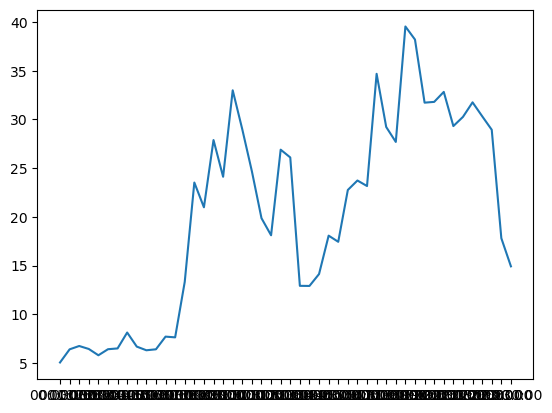

In [27]:
plt.plot(Load_Profiles.iloc[:,0:55].sum(axis=1))

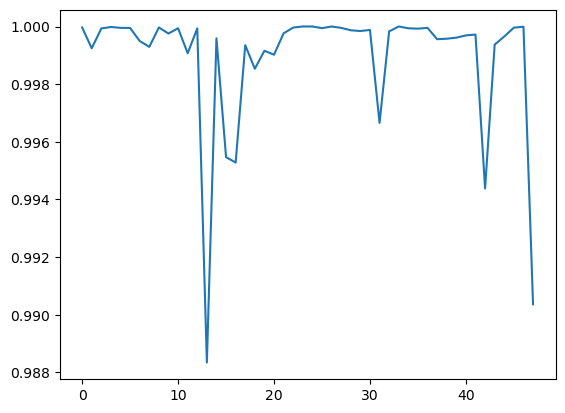

In [45]:
plt.plot(min_volc)